In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("train_data.csv")

In [4]:
df.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,4a122afe-6e52-4ed0-840d-66155da95ba1,2259.833995,67.884986,1058.573968,31.799362,99.017120,10.507787,0.315652,0.982880,3328.915749,...,-0.812408,-0.156490,-0.000055,-0.000191,0.017395,0.007729,0.007729,2.250533,-0.812408,-0.156490
1,0848f722-52ec-420c-adb1-a1e90a2e2709,2430.367576,60.980572,1541.466293,38.677070,99.122594,13.644635,0.342359,0.877406,3985.478504,...,0.014594,-0.595771,-0.000035,-0.000671,0.021513,0.011262,0.011262,1.910181,0.014594,-0.595771
2,7814286a-f939-45a7-8620-82b339a7ad4b,989.800997,27.651929,2478.164707,69.232133,95.693128,111.535043,3.115939,4.306872,3579.500746,...,-0.470107,0.170303,0.000080,-0.001355,0.029976,0.015781,0.015781,1.899494,-0.470107,0.170303
3,de843d67-0ed3-4dfe-af91-78923dc31810,2025.914557,57.014236,1464.561241,41.216368,95.883762,62.872820,1.769396,4.116238,3553.348618,...,0.176038,-0.506675,0.000024,0.000587,0.023851,0.011562,0.011562,2.062848,0.176038,-0.506675
4,ba117ec1-3de8-4da3-a315-4c7716589439,1576.443907,71.274370,619.624143,28.014521,97.524479,15.728281,0.711109,2.475521,2211.796331,...,0.410326,0.208714,-0.000109,-0.000151,0.014282,0.007043,0.007043,2.027828,0.410326,0.208714


In [5]:
df.shape

(5000, 37)

In [6]:
df.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

## Dimensionality reduction

In [7]:
import seaborn as sn

In [8]:
df1=df.copy()

In [9]:
df1=df1.drop("uuid",axis=1)

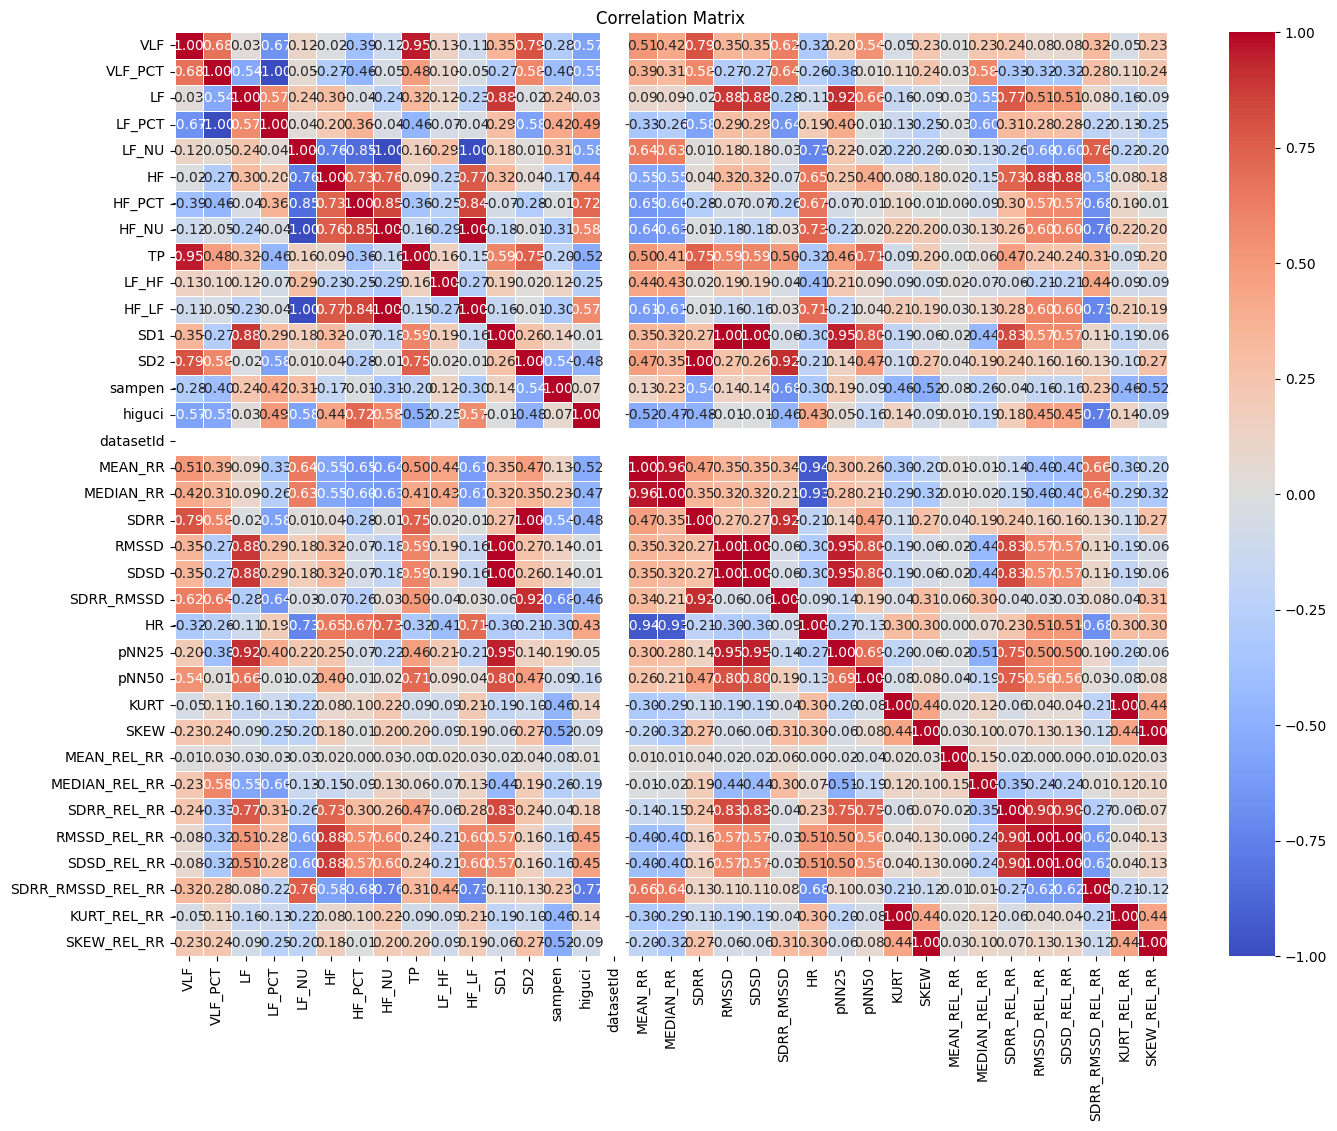

In [10]:
cor_matrix = df1.select_dtypes(include=["float64", "int64"]).corr()

# Plotting the correlation matrix
plt.figure(figsize=(16, 12))
sn.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=np.zeros_like(cor_matrix, dtype=bool))
plt.title("Correlation Matrix")
plt.show()


In [11]:
correlation_threshold = 0.7
non_highly_correlated_columns = set()
for col in cor_matrix.columns:
    correlated_cols = cor_matrix.index[abs(cor_matrix[col]) > correlation_threshold].tolist()
    non_highly_correlated_columns.add(col)
    non_highly_correlated_columns -= set(correlated_cols)
non_highly_correlated_columns = list(non_highly_correlated_columns)
selected_columns = df1[non_highly_correlated_columns]
print(selected_columns)

      datasetId
0             2
1             2
2             2
3             2
4             2
...         ...
4995          2
4996          2
4997          2
4998          2
4999          2

[5000 rows x 1 columns]


In [12]:
df2=df1.drop(["datasetId"],axis=1)

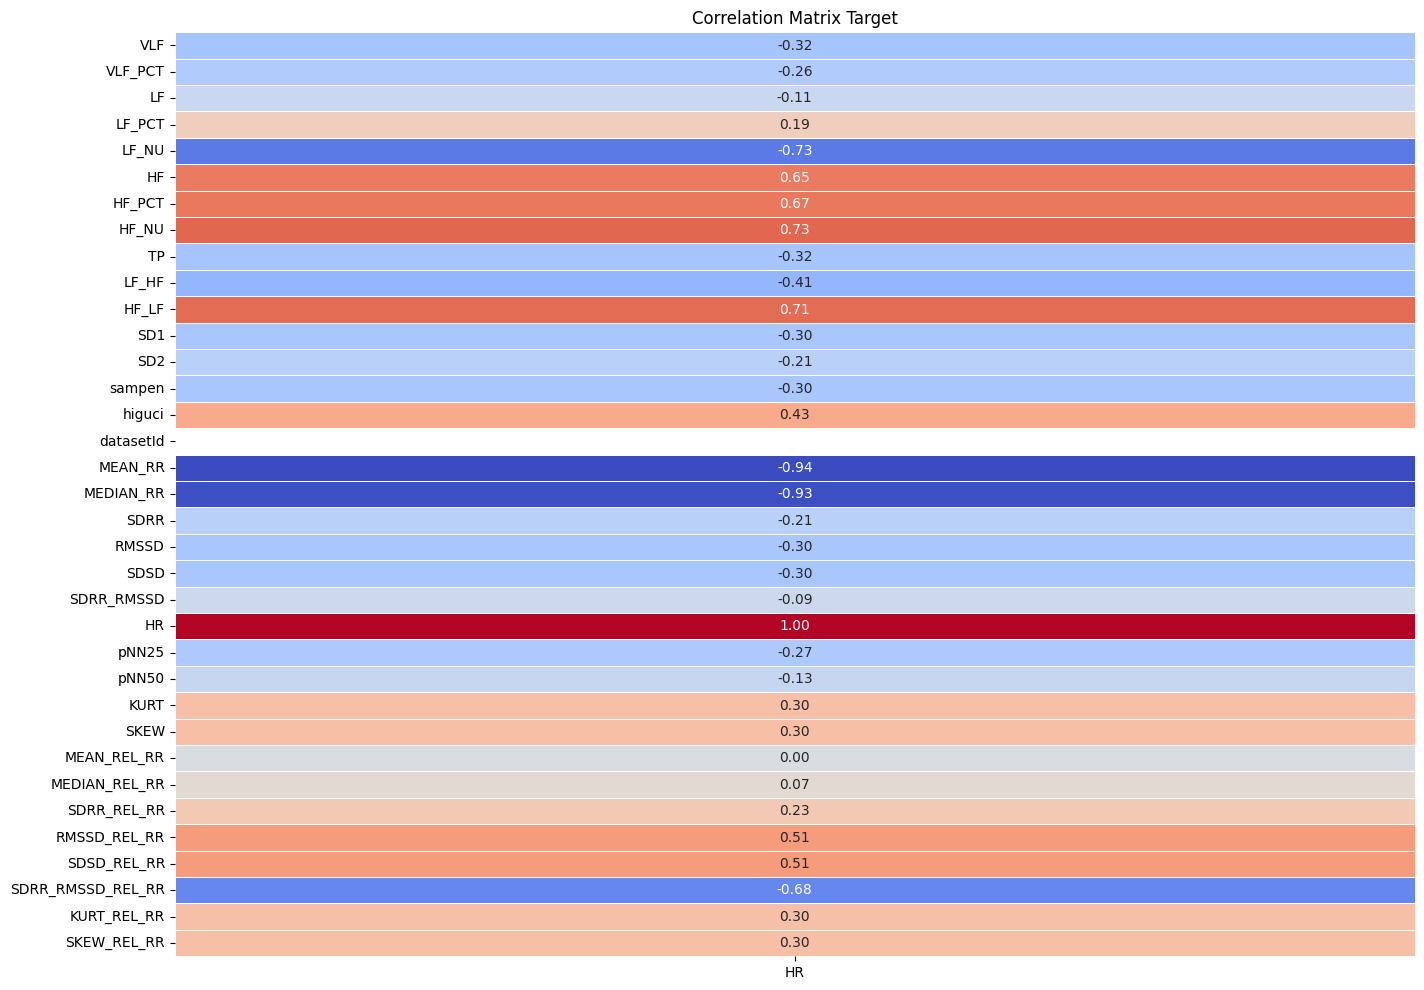

In [13]:

cor_matrix = df1.select_dtypes(include=["float64", "int64"]).corr()
cor_matrix_target = cor_matrix["HR"]
# Plotting the correlation matrix with the target variable
plt.figure(figsize=(16, 12))
sn.heatmap(cor_matrix_target.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, cbar=False)
plt.title("Correlation Matrix Target")
plt.show()


In [14]:
df2.columns

Index(['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
       'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci', 'condition',
       'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

In [15]:
df2["condition"].unique()

array(['interruption', 'no stress', 'time pressure'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
condition=df2["condition"].unique()

In [18]:
df2["condition"]=le.fit_transform(df["condition"])

In [19]:
df2["condition"].unique()

array([0, 1, 2])

In [20]:
df2["condition"]=df2["condition"].astype(float)

## Outlier Detection and Removal

In [21]:
df["MEAN_RR"].describe()

count    5000.000000
mean      846.784823
std       126.347739
min       549.441044
25%       759.378406
50%       824.282170
75%       924.941102
max      1321.857001
Name: MEAN_RR, dtype: float64

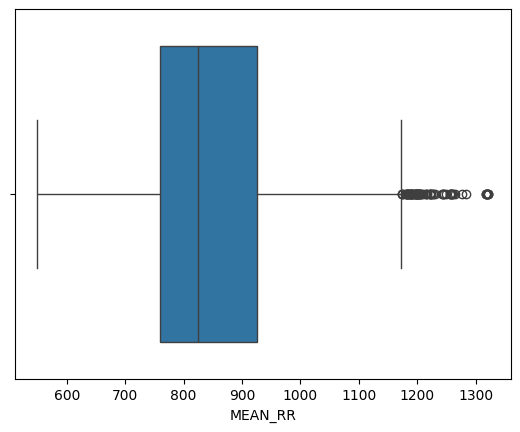

In [22]:
sn.boxplot(x=df["MEAN_RR"])
plt.show()

In [23]:
## Here outlliers are detected 

In [24]:
q1=np.percentile(df["MEAN_RR"],25,interpolation="midpoint")
q3=np.percentile(df["MEAN_RR"],75,interpolation="midpoint")
iqr=q3-q1

In [25]:
up=df2[df2["MEAN_RR"]>=(q3+1.5*iqr)]

In [26]:
len(up)

73

In [27]:
down=df2[df2["MEAN_RR"]<=(q1-1.5*iqr)]

In [28]:
df3=df2.drop(up.index)

In [29]:
len(df3)

4927

In [30]:
## Now let us see that we have detected the outliers and removed it since it has less no of samples

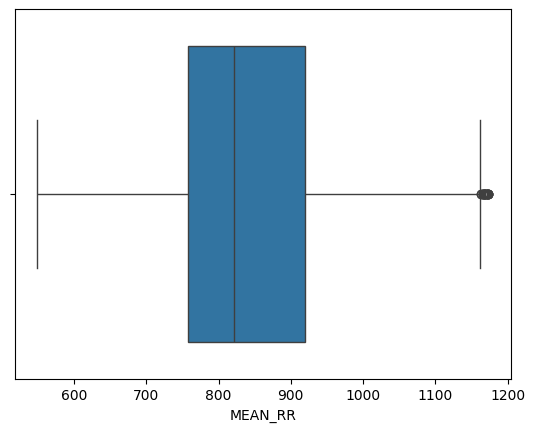

In [31]:
sn.boxplot(x=df3["MEAN_RR"])
plt.show()

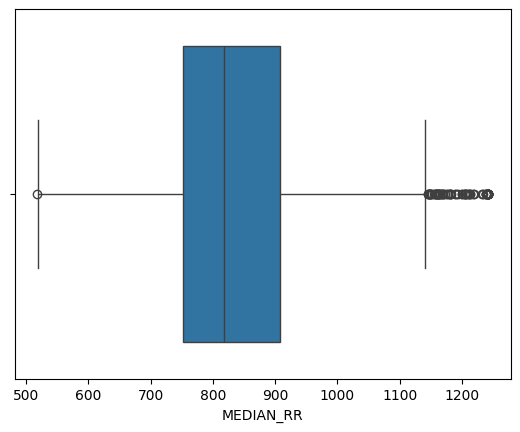

In [32]:
sn.boxplot(x=df3["MEDIAN_RR"])
plt.show()

In [33]:
q1=np.percentile(df3["MEDIAN_RR"],25,interpolation="midpoint")
q3=np.percentile(df3["MEDIAN_RR"],75,interpolation="midpoint")
iqr=q3-q1

In [34]:
up=df3[df3["MEDIAN_RR"]>=(q3+1.5*iqr)]
len(up)

65

In [35]:
df3=df3.drop(up.index)

In [36]:
df3.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,2259.833995,67.884986,1058.573968,31.799362,99.017120,10.507787,0.315652,0.982880,3328.915749,100.741860,...,-0.812408,-0.156490,-0.000055,-0.000191,0.017395,0.007729,0.007729,2.250533,-0.812408,-0.156490
1,2430.367576,60.980572,1541.466293,38.677070,99.122594,13.644635,0.342359,0.877406,3985.478504,112.972337,...,0.014594,-0.595771,-0.000035,-0.000671,0.021513,0.011262,0.011262,1.910181,0.014594,-0.595771
2,989.800997,27.651929,2478.164707,69.232133,95.693128,111.535043,3.115939,4.306872,3579.500746,22.218709,...,-0.470107,0.170303,0.000080,-0.001355,0.029976,0.015781,0.015781,1.899494,-0.470107,0.170303
3,2025.914557,57.014236,1464.561241,41.216368,95.883762,62.872820,1.769396,4.116238,3553.348618,23.294028,...,0.176038,-0.506675,0.000024,0.000587,0.023851,0.011562,0.011562,2.062848,0.176038,-0.506675
4,1576.443907,71.274370,619.624143,28.014521,97.524479,15.728281,0.711109,2.475521,2211.796331,39.395541,...,0.410326,0.208714,-0.000109,-0.000151,0.014282,0.007043,0.007043,2.027828,0.410326,0.208714


In [37]:
df3.shape

(4862, 35)

In [38]:
x=df3.drop(["HR"],axis=1)
y=df3["HR"]

## Scaling and Transformation

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=15)

## Model Training and selection

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
lr.score(x_test,y_test)

0.9809462894706023

In [45]:
y_preds=lr.predict(x_test)

In [46]:
y_preds[:5],y_test[:5]

(array([70.46875 , 68.625   , 78.15625 , 89.25    , 54.078125]),
 2276    69.381907
 740     68.444125
 155     78.173047
 773     86.487051
 1941    54.708064
 Name: HR, dtype: float64)

In [47]:
test_df=pd.read_csv("sample_test_data.csv")

In [48]:
test_df.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,1ae30e0b-098e-46fc-a897-0a6661f26370,1038.142757,43.053026,1316.747853,54.607113,95.891158,56.421352,2.339861,4.108842,2411.311962,...,-0.165101,-0.224105,-0.000032,-0.000942,0.022748,0.012756,0.012756,1.783259,-0.165101,-0.224105
1,428b41b3-9461-4c79-ab4e-d03b122b2553,1069.353244,27.758342,2663.293874,69.133958,95.698188,119.720039,3.107701,4.301812,3852.367156,...,-0.729494,0.169267,0.000129,-0.002245,0.031830,0.017082,0.017082,1.863380,-0.729494,0.169267
2,88f82ac7-02dd-447e-a289-22e8e22432c2,1044.054317,62.673708,618.715329,37.140964,99.503494,3.087286,0.185327,0.496506,1665.856933,...,0.408727,-0.099498,-0.000022,0.000121,0.012729,0.005996,0.005996,2.122806,0.408727,-0.099498
3,1d09b18f-d82f-4c1a-bb2d-71fda6fea837,4587.562353,73.598925,1622.011912,26.022171,98.564819,23.617762,0.378903,1.435181,6233.192027,...,6.720692,2.506984,-0.000093,-0.001052,0.022455,0.011130,0.011130,2.017539,6.720692,2.506984
4,a6302640-f70a-4a3a-ad36-a8c3d5df9400,1837.820853,49.193639,1873.914322,50.159766,98.727334,24.156100,0.646595,1.272666,3735.891274,...,-0.320871,-0.007052,0.000090,-0.000726,0.023134,0.012082,0.012082,1.914702,-0.320871,-0.007052


In [49]:
le=LabelEncoder()
test_df["condition"]=le.fit_transform(test_df["condition"])


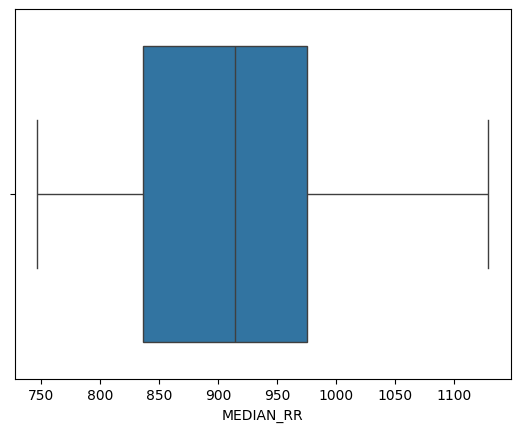

In [50]:
sn.boxplot(x=test_df["MEDIAN_RR"])
plt.show()

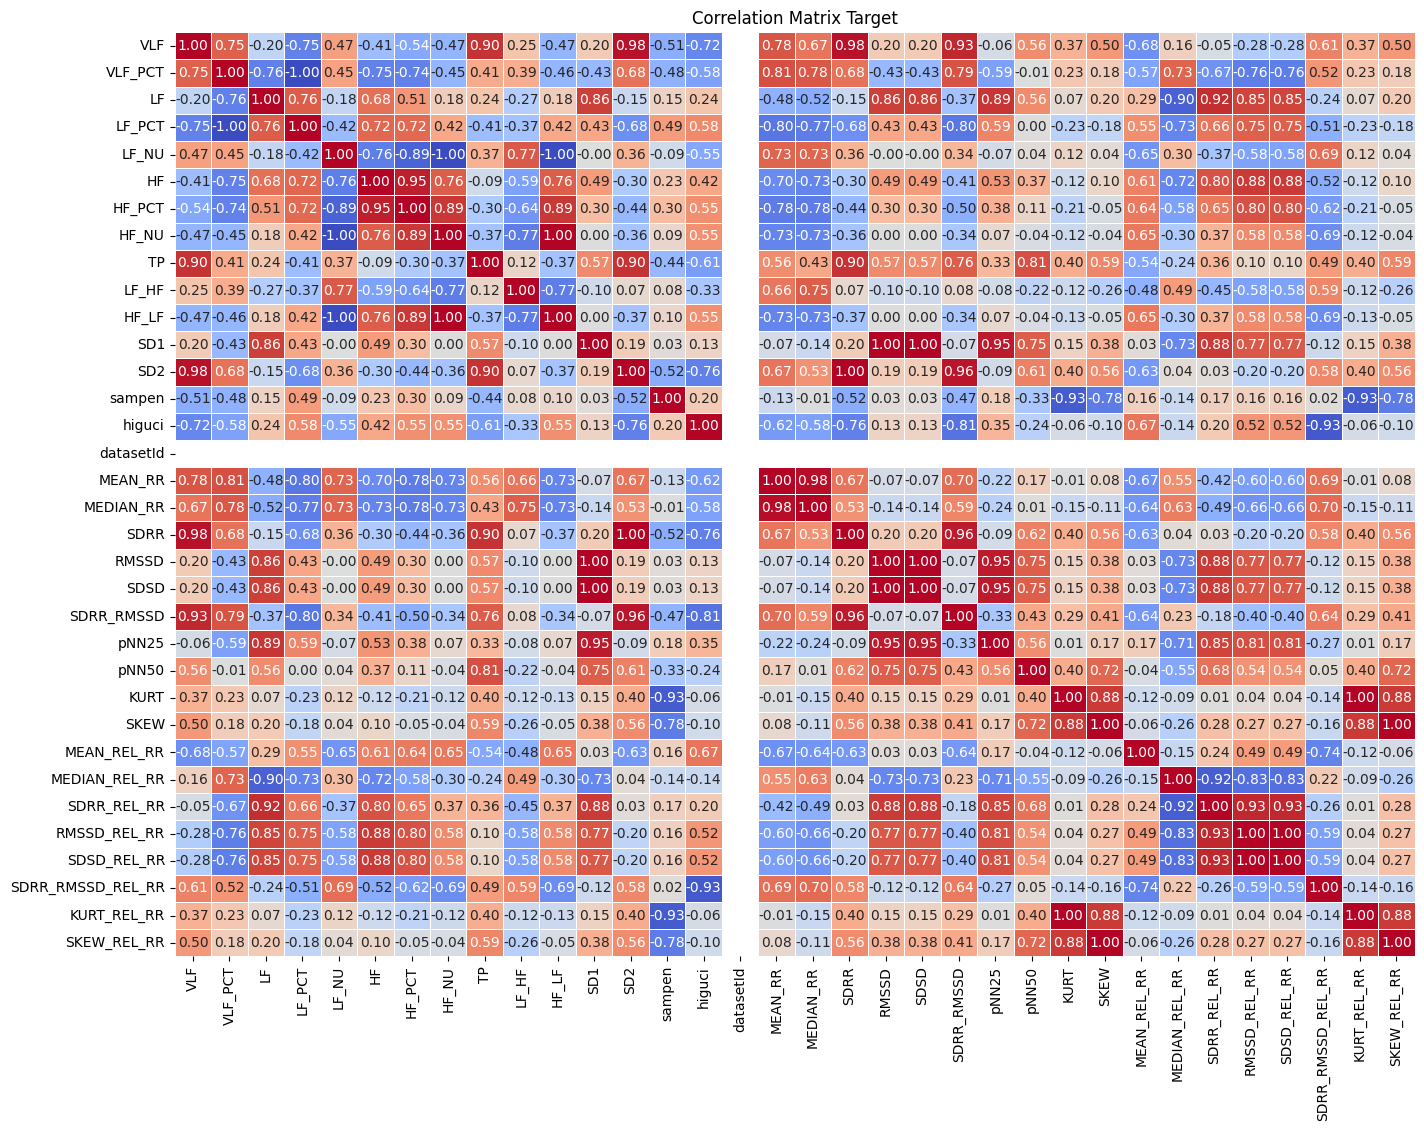

In [51]:
test_cor_matrix = test_df.select_dtypes(include=["float64", "int64"]).corr()
test_cor_matrix_target = test_cor_matrix
# Plotting the correlation matrix with the target variable
plt.figure(figsize=(16, 12))
sn.heatmap(test_cor_matrix_target, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, cbar=False)
plt.title("Correlation Matrix Target")
plt.show()

In [52]:
x_new=test_df.drop(["uuid","datasetId"],axis=1)

In [53]:
from sklearn.preprocessing import StandardScaler
x_new_scaled=scaler.fit_transform(x_new)

In [54]:
test_preds=lr.predict(x_new_scaled)
test_preds=[np.round(i,2) for i in test_preds]

In [55]:
test_preds

[7789234215184.95,
 13985653787443.31,
 256634594417.09,
 3728811586427.38,
 5465783996736.17,
 1377211262319.55,
 5246390649373.52,
 4095537979660.41,
 471765774304.25,
 1702821906519.42]

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()

In [57]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [58]:
rfc.score(x_test,y_test)

0.9977161267756239

In [59]:
test_df["uuid"]

0    1ae30e0b-098e-46fc-a897-0a6661f26370
1    428b41b3-9461-4c79-ab4e-d03b122b2553
2    88f82ac7-02dd-447e-a289-22e8e22432c2
3    1d09b18f-d82f-4c1a-bb2d-71fda6fea837
4    a6302640-f70a-4a3a-ad36-a8c3d5df9400
5    3f6508be-4b0a-4008-b701-49d8c2d5dd43
6    a07d84c8-fc44-45ef-bb85-f06f06b70e9f
7    f4a449db-a7ff-437b-852b-821a6e965f2f
8    94364ef1-12e2-4ddd-9f35-99e270547849
9    231d34f5-1028-4f2e-8e1d-00d086b0c218
Name: uuid, dtype: object

In [60]:
rfc.predict(x_new_scaled)

array([ 97.37390497, 110.96403126,  68.5398142 ,  80.60489655,
        72.58204243,  56.07078018,  96.6568541 ,  68.87706452,
        63.34379419,  86.35230313])

## Lets Try K Fold method
Splitting Data:

The dataset is divided into 'k' subsets or folds. 
Training and Testing:

    The model is trained on (k-1) folds and tested on the remaining fold. This process is repeated 'k' times, each time using a different fold as the test set. 
Performance Metrics:

    The performance metrics (e.g., accuracy, precision, recall) are recorded for each iteration. 
Average Performance:

    The average performance across all iterations is calculated to assess the model's overall performance.

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [64]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(rfc,x_scaled,y,cv=cv)

array([0.99855838, 0.99766277, 0.99843739, 0.99796905, 0.9974798 ])

## Now we are going to perform Hyperparameter Tuning using GridSearchCV

In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn .linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [69]:
def best_model_using_gridSearch(x,y):
    algos={
        "lasso":{
            "model":Lasso(),
            "params":{"alpha": [1,2],"selection":["random","cyclic"]}
        },
        "decision_tree":{
            "model":DecisionTreeRegressor(),
            "params":{"criterion": ["mse","friedman_mse"],"splitter":["best","random"]}
        },
        "knn":{
            "model":KNeighborsRegressor(),
            "params":{"n_neighbors":[2,4,6,8,10]}
        },
        "svm":{
            "model":SVR(),
            "params":{"kernel":["linear","poly","rbf","sigmoid"],"C":[1,2,3,4],"epsilon":[0.1]}
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for name,config in algos.items():
        gs=GridSearchCV(config["model"],config["params"],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({"model":name,
                      "best_score":gs.best_score_,
                      "best_params":gs.best_params_})
    return pd.DataFrame(scores,columns=["model","best_score","best_params"])

In [70]:
best_model=best_model_using_gridSearch(x_scaled,y)

C:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

In [71]:
best_model

,model,best_score,best_params
0,lasso,0.647325,"{'alpha': 1, 'selection': 'cyclic'}"
1,decision_tree,0.995379,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,knn,0.993347,{'n_neighbors': 2}
3,svm,0.999539,"{'C': 4, 'epsilon': 0.1, 'kernel': 'poly'}"


In [72]:
svm=SVR(kernel="poly",epsilon=0.1,C=4)


In [74]:
svm.fit(x_train,y_train)

SVR(C=4, kernel='poly')

In [75]:
svm.score(x_test,y_test)

0.9994471223831245

In [76]:
svm_y_preds=svm.predict(x_test)
svm_y_preds[:5],y_test[:5]

(array([69.32294654, 68.30319863, 78.13259649, 86.67131024, 54.768622  ]),
 2276    69.381907
 740     68.444125
 155     78.173047
 773     86.487051
 1941    54.708064
 Name: HR, dtype: float64)

In [77]:
svm.predict(x_new_scaled)

array([ 95.47423228, 106.80524119,  68.31385918,  78.89757635,
        71.87752115,  55.76784895,  94.53131914,  67.20864795,
        68.59211831,  86.84779287])

In [79]:
knn=KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train,y_train)


KNeighborsRegressor(n_neighbors=2)

In [80]:
knn.score(x_test,y_test)

0.9947792816453839

In [81]:
knn.predict(x_new_scaled)

array([87.10404786, 99.71723786, 71.70065525, 66.50864239, 72.82503819,
       53.69705021, 74.6887576 , 61.8573895 , 65.10688299, 85.24728352])

In [83]:
dt=DecisionTreeRegressor(criterion="friedman_mse",splitter="best")

In [84]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [85]:
dt.score(x_test,y_test)

0.9963272043375156

In [86]:
dt.predict(x_new_scaled)

array([100.46116946, 110.62266296,  68.33706453,  80.9936745 ,
        75.28155269,  56.71031794,  94.28041618,  68.59529443,
        61.39942383,  85.93216635])

###### All the model are performing well at a accuracy of 99 which is a very good score 
Now let us conclude the final model by computing its mean squared error

In [92]:
from sklearn.metrics import mean_squared_error
def mse_func(model,x_test,y_test):
    preds=model.predict(x_test)
    mse=mean_squared_error(preds,y_test)
    return mse

In [93]:
arr=[lr,rfc,svm,knn,dt]
for i in arr:
    print(mse_func(i,x_test,y_test))

1.9807440160081642
0.23742190349352074
0.05747484352307458
0.5427240339468274
0.38180846818587993


#### Here Since SVM performs well Let us conclude it as our final model 


In [96]:
from sklearn.metrics import mean_absolute_error

In [112]:
def mae_func(model,x_test,y_test):
    preds=model.predict(x_test)
    mse=mean_absolute_error(preds,y_test)
    return mse
mae_func(svm,x_test,y_test)

0.12952540742056864

In [113]:
import pickle
with open("Heart_rate_prediction.pickle","wb") as f:
    pickle.dump(svm,f)

In [114]:
import json
columns={"data_columns":[col.lower() for col in x.columns]}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))